### Eigenfaces ###
This notebook presents the idea of eigen-faces. The data was taken from here: http://vision.ucsd.edu/~leekc/ExtYaleDatabase/ExtYaleB.html

When publishing work based on this data please reference the paper:

**Athinodoros Georghiades, Peter Belhumeur, and David Kriegman /  
"From Few to Many: Illumination Cone Models for Face Recognition under Variable Lighting and Pose", PAMI, 2001**

In [9]:
!pwd 
#Data_Dir='/home/ubuntu/UCSD_BigData/data/CroppedYale' 
# Change this line so that it points to /UCSD_BigData/data/CroppedYale on your machine
Data_Dir = '/Users/yoavfreund/academic.papers/Courses/BigDataAnalytics/UCSD_BigData/data/CroppedYale'
!ls $Data_Dir


/Users/yoavfreund/academic.papers/Courses/BigDataAnalytics/UCSD_BigData/data/CroppedYale
yaleB01 yaleB03 yaleB05 yaleB07 yaleB09 yaleB11 yaleB13 yaleB16 yaleB18 yaleB20 yaleB22 yaleB24 yaleB26 yaleB28 yaleB30 yaleB32 yaleB34 yaleB36 yaleB38
yaleB02 yaleB04 yaleB06 yaleB08 yaleB10 yaleB12 yaleB15 yaleB17 yaleB19 yaleB21 yaleB23 yaleB25 yaleB27 yaleB29 yaleB31 yaleB33 yaleB35 yaleB37 yaleB39


### Collect and display all images from a single person ###

In [10]:
def image_grid(D,H,W,cols=10,scale=1):
    """ display a grid of images
        H,W: Height and width of the images
        cols: number of columns = number of images in each row
        scale: 1 to fill screen
    """
    n=shape(D)[0]
    rows = int(ceil((n+0.0)/cols))
    fig=plt.figure(1,figsize=[scale*20.0/H*W,scale*20.0/cols*rows],dpi=300)
    for i in range(n):
        subplot(rows,cols,i+1)
        fig=plt.imshow(reshape(D[i,:],[H,W]), cmap = cm.Greys_r)
        plt.axis('off')

In [23]:
import Image
import scipy.misc
from glob import glob

SetNo='11'   # can be any number from 01 to 39
%cd $Data_Dir
#read in files
files=glob('yaleB'+SetNo+'/*.png')
files=[name for name in files if name.find('Ambient')==-1]

im_number=len(files)

print 'number of files:',im_number

#read one file to find out the image size
im = Image.open(files[0]).convert("L")
(H,W)=shape(im)
print 'shape=',(H,W)
arr=np.zeros([im_number,H*W])

for i in range(im_number):
    im = Image.open(files[i]) #.convert("L")
    arr[i,:] = np.reshape(np.asarray(im),[1,H*W])

image_grid(arr,H,W,cols=8)

/Users/yoavfreund/academic.papers/Courses/BigDataAnalytics/UCSD_BigData/data/CroppedYale
number of files: 60


IOError: cannot identify image file 'yaleB11/yaleB11_P00A+000E+00.png'

In [22]:
%cd yaleB15
fp=open('yaleB15_P00A+000E+00.png','rb')
im = Image.open(fp)

[Errno 2] No such file or directory: 'yaleB15'
/Users/yoavfreund/academic.papers/Courses/BigDataAnalytics/UCSD_BigData/data/CroppedYale/yaleB15


IOError: cannot identify image file <open file 'yaleB15_P00A+000E+00.png', mode 'rb' at 0x107d78d20>

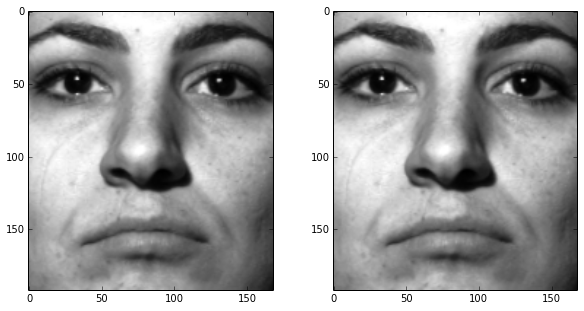

In [19]:
image_i=10
fig=plt.figure(1,figsize=[10,5],dpi=300)
subplot(1,2,1)
plt.imshow(np.reshape(arr[image_i,:],[H,W]), cmap = cm.Greys_r)
# Testing flattening and deflattenning
flat=np.reshape(arr[image_i,:],[H*W])
flat=(flat-mean(flat))/std(flat)
recon=np.reshape(flat,[H,W])
# Shifting and scaling the image does not change how it is displayed
subplot(1,2,2)
plt.imshow(recon, cmap = cm.Greys_r)

In [20]:
#Normalize all of the images to have mean zero and std 1
means=np.zeros(im_number)
stds=np.zeros(im_number)
means2=np.zeros(im_number)
stds2=np.zeros(im_number)

D0=np.zeros([im_number,H*W])  #the normalized data

for i in range(im_number):
    flat=arr[i,:]
    means[i]=mean(flat)
    stds[i]=std(flat)
    D0[i,:]=(flat-means[i])/stds[i]
    means2[i]=mean(D0[i,:])
    stds2[i]=std(D0[i,:])
print 'means=',means, 
print 'means2=',means2 
print 'stds=',stds
print 'stds2=',stds2

means= [ 117.07676091  123.46831597  109.78379216   38.27421255  107.74968998
   77.65460689  121.23074777  112.23226687  126.58801463   99.76543899
  122.71701389  109.57266865   98.97005208   59.73493304   82.79591394
  102.71729291   97.40597098   74.72550843   77.44091022   72.44078621
   43.41979787   83.38715278   61.42779638   76.98608011   70.85416667
   42.92454117   64.87323289   49.54591394   51.01370288   43.82917907
   39.10270957   35.69559152   26.86514137   21.02511161   19.94419643
   97.52582465  122.23573909  122.04349578   99.67088294  128.91102431
  131.94345238  110.58076017   67.73722718  114.80797371  110.03295511
   68.00142609   91.11938864   97.40268477   52.65711806   92.2155568
   69.98945933   75.27681672   74.73211186   46.27824281   69.812469
   48.58038814   51.5719246    35.85026042   39.27229043   27.90485491
   25.29268973   21.59446305   12.68799603] means2= [  6.80858313e-16  -4.89494908e-16  -4.42857005e-16   5.96434759e-15
  -2.84402407e-15  -3.6

### Finding the mean image ###

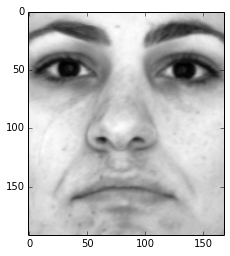

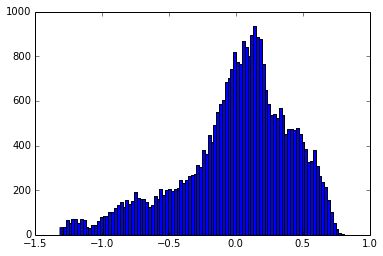

In [21]:
mean_image=zeros(H*W)
for i in range(im_number):
    mean_image=mean_image+D0[i,:]
mean_image=mean_image/im_number
plt.imshow(np.reshape(mean_image,[H,W]), cmap = cm.Greys_r)
figure()
hist(mean_image,bins=100);

Note how flat the illumination seems to be on this one!

### Subtracting out the mean image ###

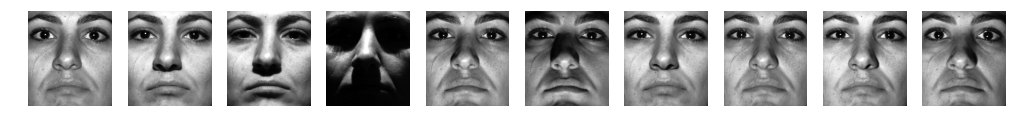

In [22]:
D1=0*D0
for i in range(im_number):
    D1[i,:]=D0[i,:] - mean_image
image_grid(D0[:10,:],H,W)

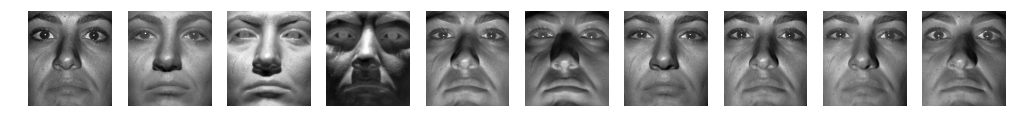

In [23]:
image_grid(D1[:10,:],H,W)

### Compute the average lengths of vectors ###

In [24]:
def err(V):
    """ err = the average of the square values """
    return np.dot(V,V)/len(V)

def meanErr(D):
    """ meanErr = the average err over all rows of D """
    total_err=0
    n=shape(D)[0]
    for i in range(n):
        total_err += err(D[i,:])
    return total_err/n
print 'before subtracting mean mean err=',meanErr(D0)
print 'after subtracting mean mean err=',meanErr(D1)

before subtracting mean mean err= 1.0
after subtracting mean mean err= 0.82839502587


### Using iterative PCA to find the largest eigen-vector ###

In [29]:
shape(D1),H,W,H*W,im_number

((63, 32256), 192, 168, 32256, 63)

In [36]:
from numpy.linalg import norm

def streaming_PCA(D,k=20,L=10):
    R=copy(D)   #R is a matrix in which each row is the residual vector after the current eigenvectors have been projected out.
    (im_number,sz)=shape(R)
    eigvecs=np.zeros([k,sz])
    Coeffs=np.zeros([im_number,k])  # Coeffs holds the coefficients of the eigenvectors that approximate each image
    var_remaining=np.zeros(k)

    factor=im_number*sz

    for e in range(k):
        print 'starting on eigenvec',e
        V=np.random.normal(size=sz)  # initialize V: the "current vector" in the eigenvector finding algorithm.
        V=V/norm(V)

        # Iterate L times through the data to find the next eigenvector.
        for j in range(L):
            acc_length=0; acc_explained=0
            Vprev=V/norm(V)
            for i in range(im_number):
                X=R[i,:]
                d=np.dot(V,X)/norm(V)
                V=V+d*X
                #print acc_length,acc_explained
                acc_length += np.dot(X,X)
                acc_explained += d*d
            NV=V/norm(V) # normalized version of updated vector
            print '%4d: change=%5.4f, total variance=%5.4f, captured variance=%5.4f' % (j,norm(NV-Vprev),acc_length/factor,acc_explained/factor)
        var_remaining[e]=acc_length/factor
        eigvecs[e,:]=NV
        # subtract projection on V from each data vector
        for i in range(im_number):
            X=R[i,:]
            d=np.dot(X,NV)
            Coeffs[i,e]=d
            X=X-NV*d
            R[i,:]=X
    return (eigvecs,Coeffs,var_remaining)

In [37]:
(eigvecs,Coeffs,var_remaining) = streaming_PCA(D1)

starting on eigenvec 0
   0: change=1.4127, total variance=0.8284, captured variance=0.2134
   1: change=0.2120, total variance=0.8284, captured variance=0.3743
   2: change=0.0717, total variance=0.8284, captured variance=0.3967
   3: change=0.0366, total variance=0.8284, captured variance=0.4031
   4: change=0.0226, total variance=0.8284, captured variance=0.4059
   5: change=0.0155, total variance=0.8284, captured variance=0.4075
   6: change=0.0114, total variance=0.8284, captured variance=0.4085
   7: change=0.0087, total variance=0.8284, captured variance=0.4091
   8: change=0.0070, total variance=0.8284, captured variance=0.4096
   9: change=0.0057, total variance=0.8284, captured variance=0.4099
starting on eigenvec 1
   0: change=1.4197, total variance=0.4178, captured variance=0.1071
   1: change=0.0271, total variance=0.4178, captured variance=0.1219
   2: change=0.0155, total variance=0.4178, captured variance=0.1234
   3: change=0.0114, total variance=0.4178, captured vari

[ 1.          0.50442997  0.35257333  0.15386192  0.11803092  0.09320687
  0.0717249   0.06085625  0.05532473  0.04981368  0.04301172  0.03804766
  0.03316075  0.02977515  0.02730158  0.02476352  0.0225805   0.02082796
  0.01894878  0.01735151]


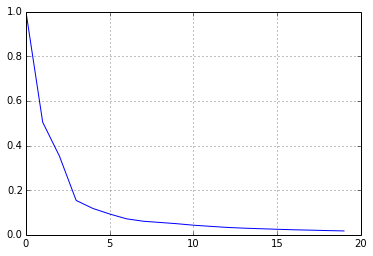

In [34]:
print var_remaining/var_remaining[0]
plot(var_remaining/var_remaining[0]);
grid()

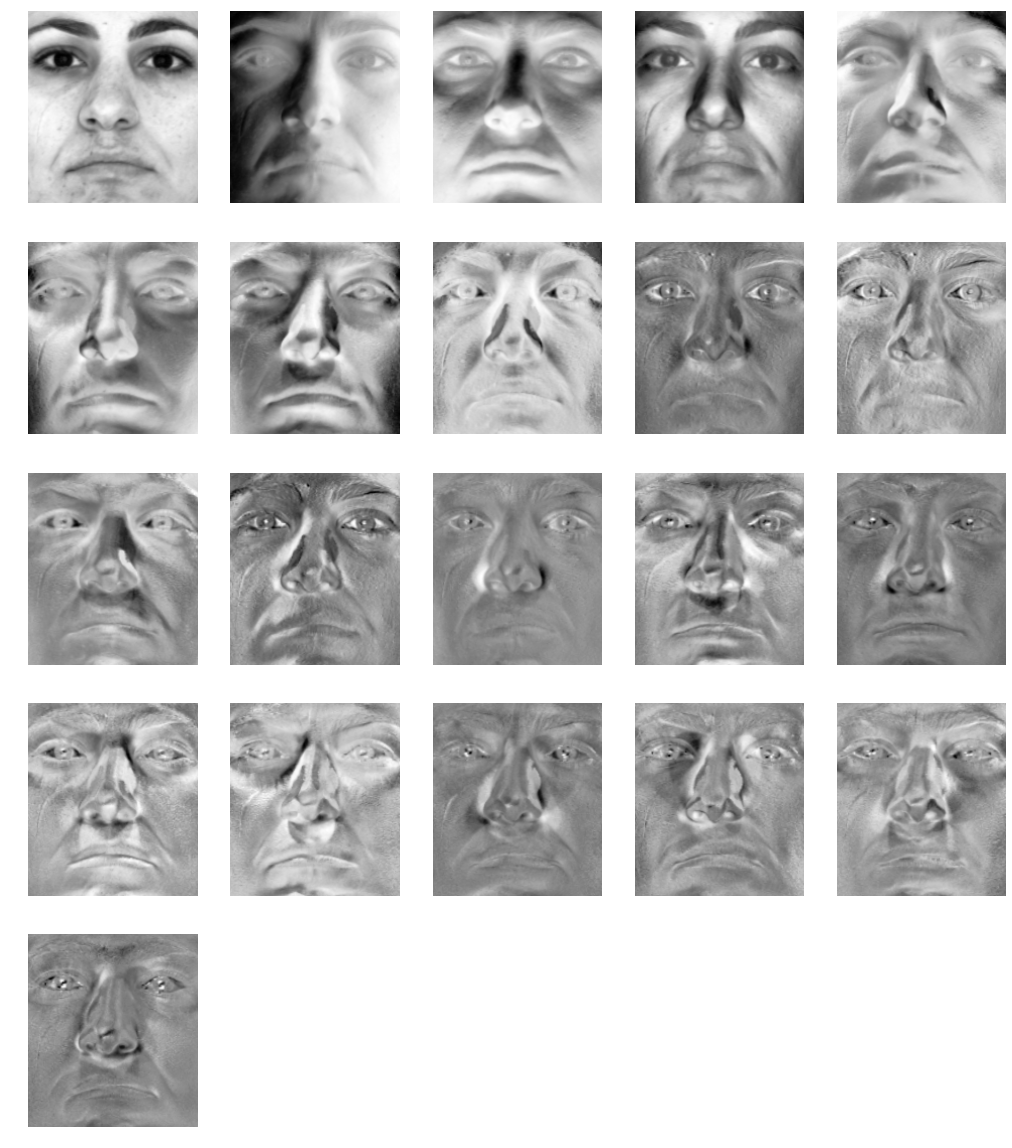

In [35]:
tmp=np.zeros([k+1,H*W])
tmp[0,:]=mean_image
tmp[1:,:]=eigvecs
image_grid(tmp,H,W,cols=5)

### Reconstruction of specific images ###
From the analysis above it is clear that the top k eigenvectors explain most of the variance

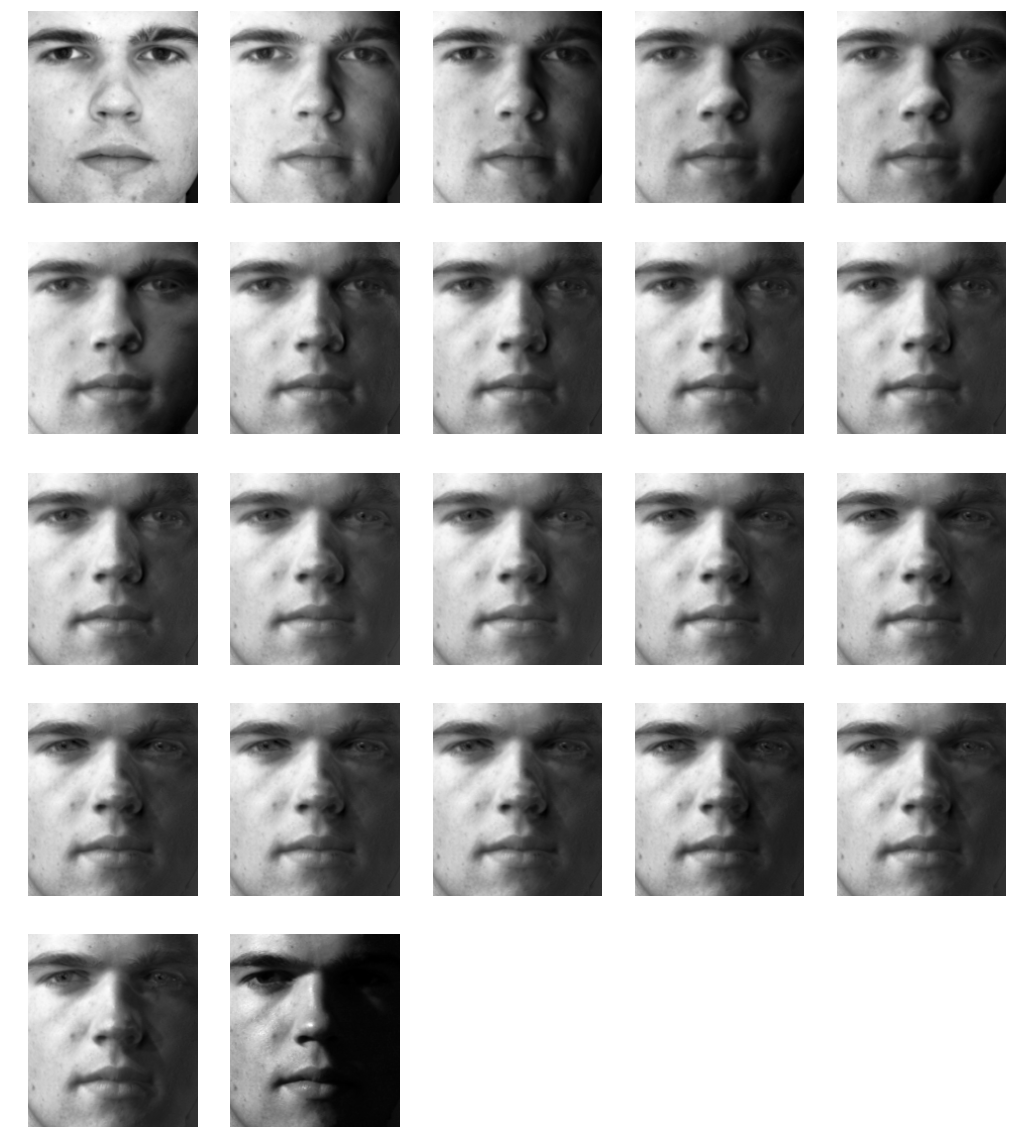

In [39]:
im=21
Approx=np.zeros([k+2,H*W])
Approx[0,:]=mean_image
for i in range(1,k+1):
    Approx[i,:]=Approx[i-1,:]+Coeffs[im,i-1]*eigvecs[i-1,:]
Approx[k+1,:]=D0[im,:]
image_grid(Approx,H,W,cols=5)

## Excercises ##

1. Alter the cell "Reconstruction of specific images" so that under each of the reconstruction you'll have the average per-pixel squared error. Take a square root on the outside to make the be a Root-Mean-Square quantity.

2. There seems to be a bug in the reconstruction code above, the findal reconstruction is quite different from the image to be reconstructed. Can you find the bug?

3. Use the eigenvectors to model the difference between faces (keeping the illumination fixed). How many eigenvectors do you need in order to have a good reconstruction?